In [6]:
library(tidyverse)
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




# **Project: Analyzing Hip Hop Music Preferences**

# **The Data:**

The dataset used for this project named "hiphop" presents findings from a research endeavor led by a linguist affiliated with the University of Minnesota. This study delves into the relationship between familiarity with African American English (AAE) and musical preferences, particularly within the realm of hip hop. A total of 168 participants took part in the investigation, each tasked with defining 64 distinct AAE terms. These definitions were utilized to establish a "familiarity" score for each participant in relation to each term, measuring their proficiency on a scale from 1 to 5 (1 indicating minimal familiarity and 5 indicating a thorough understanding).

Here is an quick overview of the variables:

*   Word: The specific African American English (AAE) term defined by the participant.
*   Subj: Subject identifier representing each participant in the study.
*   Sex: Gender of the participant (Male/Female).
*   Age: Age of the participant at the time of the study.
*   Ethnic: Ethnicity of the participant.
*   City: City of residence for the participant.
*   County: County of residence for the participant.
*   Familiarity: a participant's familiarity with an individual vocabulary item
*   Intl: International participant indicator (1 for international, 0 for domestic).
*   Classical: Indicator for classical music recognition of AAE terms.


There are various other music variables for different genres (similar to internation and classical listed above) and pop culture testing variables.


Further information regarding each variable can be found on the following website:

[Link to Dataset Description](https://conservancy.umn.edu/bitstream/handle/11299/116327/5/explanationAAEHiphopChesley.txt)



# **Insights and Objectives:**

In this exploration of the hiphop dataset, our primary objective is to unearth valuable insights into the world of hip-hop culture and its underlying dynamics. By analyzing the dataset, we aim to achieve the following objectives:

**Understanding Lyrical Preferences:**

We seek to identify words and phrases within the dataset that resonate strongly with self-described hip-hop fans. By pinpointing these key elements, we can gain deeper insights into the linguistic nuances that define the genre.

**Exploring Genre Influences:**

Our analysis will delve into the relationship between music genres and demographic factors, shedding light on how different genres intersect with various demographic groups. By examining these influences, we can better understand the diverse landscape of hip-hop music.

**Demographic Nuances:**

We intend to uncover demographic trends and preferences within the dataset, including age, gender, and ethnicity. By examining these nuances, we aim to paint a comprehensive picture of the hip-hop audience and their diverse interests.



# **Methodology:**

Our methodology for exploring the hiphop dataset involves a systematic approach to data analysis and interpretation. Here's a breakdown of our methodology:

**Data Collection and Preparation:**

We begin by acquiring the hiphop dataset, which contains information gathered from a diverse group of participants. We preprocess the data, ensuring consistency and addressing any missing values that may affect our analysis.

**Exploratory Data Analysis (EDA):**

Our initial exploration of the dataset involves descriptive statistics and data visualization. Through EDA, we aim to gain a holistic understanding of the dataset's structure and content, identifying potential areas of interest.

**Album Name Suggestion nad Participant Search:**

Lastly, we determine the best album name based on our analysis and embark on a meticulous search to uncover the research participant believed to be Justin Bieber. Employing data filtering, comparison techniques, and deductive reasoning, we meticulously combed through the dataset's entries to identify potential matches and narrow down our search.


# Data Import & Cleaning

In [7]:
hiphop_df <- read_csv("https://www.dropbox.com/s/5d8fwxrj3jtua1z/hiphop.csv?dl=1")

Rows: 10752 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): word, subj, sex, ethnic
dbl (34): age, city, county, intl, vocal, classical, folk, rock, country, po...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**Missing Values**

Only the number of preferred artists and number of overall artists columns contain missing values. Given that these columns were only examined in the follow-up analysis for a subset of participants who listed listening to at least one hiphop artist, it is likely that missing values are expected for participants who did not meet this criterion.

Participants who did not list listening to any hiphop artists during the study would not have been included in the subset for the follow-up analysis, resulting in missing values for these columns. Based on this, I will leave these missing values as is.

In [8]:
colSums(is.na(hiphop_df))

word                subj                 sex                 age 
                  0                   0                   0                   0 
             ethnic                city              county                intl 
                  0                   0                   0                   0 
              vocal           classical                folk                rock 
                  0                   0                   0                   0 
            country                 pop         alternative              hiphop 
                  0                   0                   0                   0 
     unclassifiable         countyBlack                jayz             barkley 
                  0                   0                   0                   0 
          boondocks             monique              bieber           asianMove 
                  0                   0                   0                   0 
          blackMove        hispanicMove          nativeMove           SAAMEMove 
                  0                   0                   0                   0 
          whiteMove         blackWeekly               jayz1          boondocks1 
                  0                   0                   0                   0 
        familiarity               trial                fam1     popularityScore 
                  0                   0                   0                   0 
numPreferredArtists   numOverallArtists 
               5632                5632

**Data Types**

In preparation for later analysis, the variables 'sex' and 'subj' in the 'hiphop_df_clean' dataframe were converted to from characters to factors using the as.factor() function.

In [9]:
#data types of variables
sapply(hiphop_df, class)

word                subj                 sex                 age 
        "character"         "character"         "character"           "numeric" 
             ethnic                city              county                intl 
        "character"           "numeric"           "numeric"           "numeric" 
              vocal           classical                folk                rock 
          "numeric"           "numeric"           "numeric"           "numeric" 
            country                 pop         alternative              hiphop 
          "numeric"           "numeric"           "numeric"           "numeric" 
     unclassifiable         countyBlack                jayz             barkley 
          "numeric"           "numeric"           "numeric"           "numeric" 
          boondocks             monique              bieber           asianMove 
          "numeric"           "numeric"           "numeric"           "numeric" 
          blackMove        hispanicMove          nativeMove           SAAMEMove 
          "numeric"           "numeric"           "numeric"           "numeric" 
          whiteMove         blackWeekly               jayz1          boondocks1 
          "numeric"           "numeric"           "numeric"           "numeric" 
        familiarity               trial                fam1     popularityScore 
          "numeric"           "numeric"           "numeric"           "numeric" 
numPreferredArtists   numOverallArtists 
          "numeric"           "numeric"

In [10]:
#change sex and subject to factors
hiphop_df_clean <- hiphop_df %>%
  mutate(
    sex = as.factor(sex),
    subj = as.factor(subj)
    )

**Ethnic Variable**

I decided to make a new variable that recategorizes ethnic into only two groups, “white” and “non-white”, to simplify my data. I represents participants that are white while 0 presents whose who are not.

In [11]:
hiphop_df_clean <- hiphop_df_clean %>%
  mutate(ethnic_group = case_when(ethnic == 'white' ~ 1,TRUE ~ 0))

# Exploratory Data Analysis

**Hip Hop Words**

I was curious what the list of words included in the study looked like so I decided to print out some to get an idea.

In [12]:
hiphop_df_clean %>%
  distinct(word) %>%
  head(10)

word
<chr>
[to be] ghost
5-0
A-town
ashy
ay yo trip
ballin'
beezy
bones
boo


**Gender, Age and Ethnicity Distribution**

There are 117 females and 51 males that participated in this study. There proportion of females included in this study is around 70% and around 30% males.

The ages of subject in this study ranges from 16 to 48 and the average age is 20 years old.

After creating a new variable that recategorizes ethnic into only two groups, “white” and “non-white”, we get a count of 135 participants that are white and 33 that are not white. That breaks down to 20% of the study participants being non-white and 80% being white. Within each ethnicity group, there were also more females than males witht the majority of participants being white females.


In [13]:
hiphop_df_clean %>%
  group_by(sex) %>%
  summarise(count = n_distinct(subj))

sex,count
<fct>,<int>
Female,117
Male,51


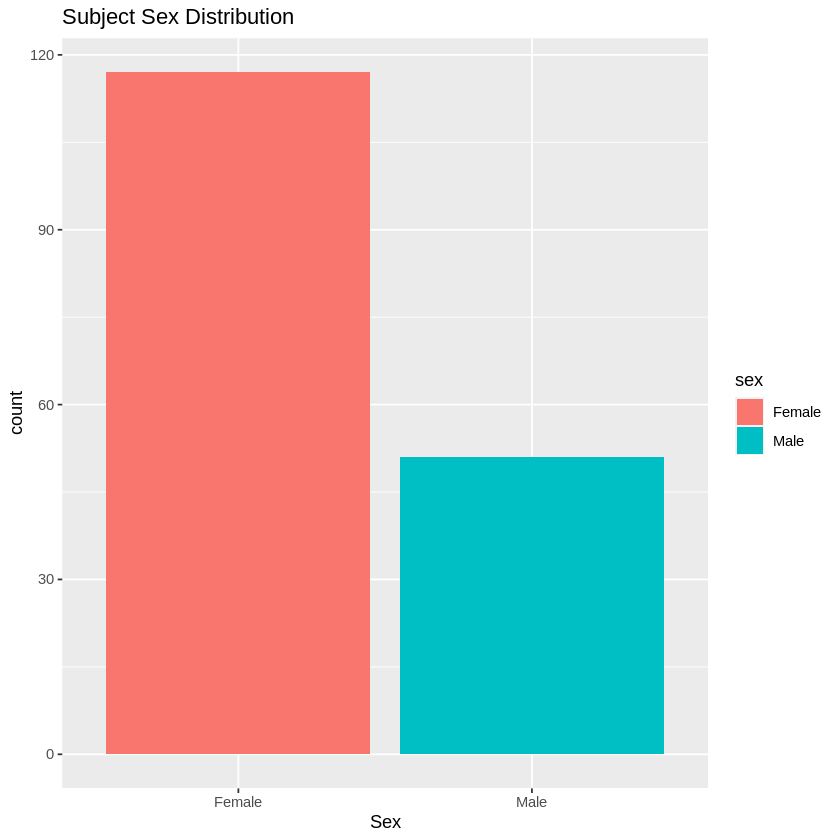

In [14]:
hiphop_df_clean %>%
  distinct(subj, sex, .keep_all = TRUE) %>%
  ggplot(aes(x = sex, fill = sex)) +
   geom_bar() + xlab("Sex") + ggtitle("Subject Sex Distribution")

In [15]:
prop.table(table(hiphop_df_clean$sex))


   Female      Male 
0.6964286 0.3035714 

In [16]:
hiphop_df_clean %>%
  summarise(min = min(age), mean = mean(age), max = max(age))

min,mean,max
<dbl>,<dbl>,<dbl>
16,20.02381,48


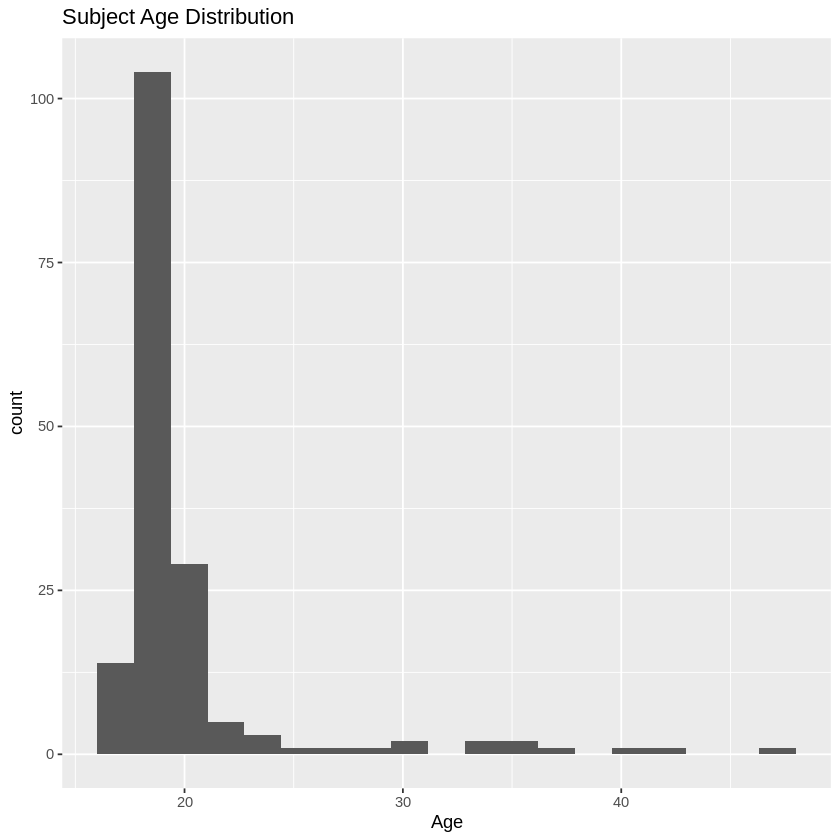

In [17]:
hiphop_df_clean %>%
  distinct(subj, age, .keep_all = TRUE) %>%
  ggplot(aes(x = age)) +
    geom_histogram(bins = 20) + xlab("Age") + ggtitle("Subject Age Distribution")

In [18]:
hiphop_df_clean %>%
  group_by(ethnic_group) %>%
  summarise(count = n_distinct(subj))

ethnic_group,count
<dbl>,<int>
0,33
1,135


`summarise()` has grouped output by 'subj', 'ethnic_group'. You can override
using the `.groups` argument.


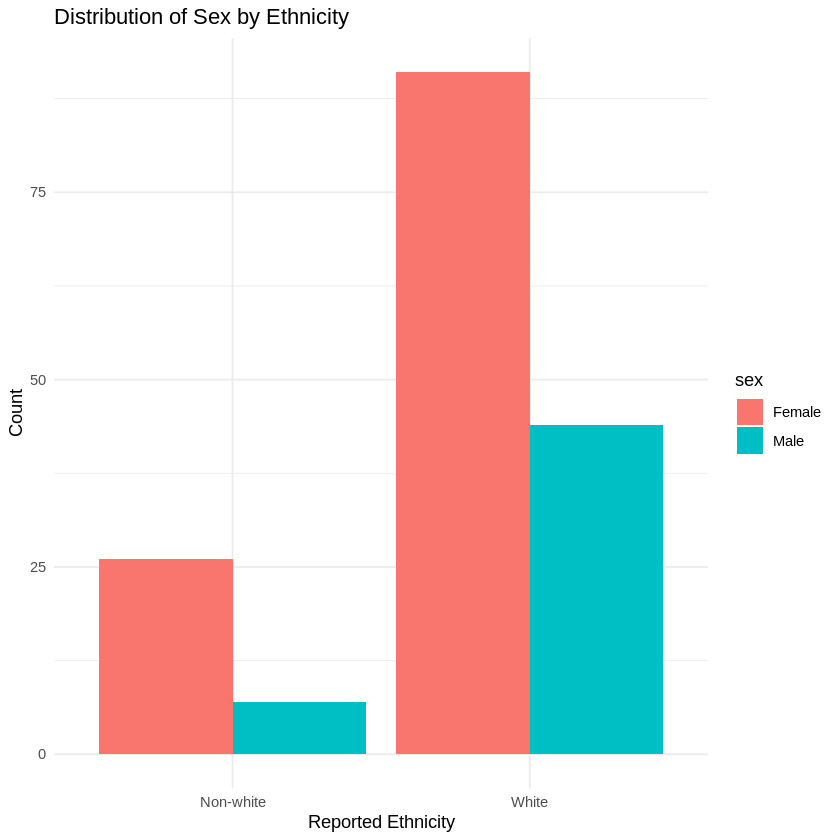

In [19]:
ethnic_group_wording <- hiphop_df_clean %>%
  mutate(
    ethnic_group = ifelse(ethnic_group == 1, "White", "Non-white")
  )

# Group by subject and ethnicity, and count the number of each sex
hiphop_df_grouped <- ethnic_group_wording %>%
  group_by(subj, ethnic_group, sex) %>%
  summarise(count = n()) %>%
  ungroup()

# Plot the distribution of sex by ethnicity
ggplot(hiphop_df_grouped, aes(x = ethnic_group, fill = sex)) +
  geom_bar(position = "dodge") +
  ggtitle("Distribution of Sex by Ethnicity") +
  xlab("Reported Ethnicity") +
  ylab("Count") +
  theme_minimal()

In [20]:
prop.table(table(hiphop_df_clean$ethnic_group))


        0         1 
0.1964286 0.8035714 

## **Word Familiarity**

After having a better understanding of the participants of this study, I was interested in finding out more about the familiarity variable. This variable represents a participant's familiarity with an individual vocabulary item. 1 = not at all, 5 = well.

**Teenagers**

People below the age of 20 were most familiar with the words “off the hook”, “feel me” and “hella”. They were least familiar with “catch the vapors”, “domino” and “The Nation”.

In [21]:
hiphop_df_clean %>%
  filter(age < 20) %>%
  group_by(word) %>%
  summarise(avg_score = mean(familiarity)) %>%
  arrange(desc(avg_score)) %>%
  top_n(3)

Selecting by avg_score


word,avg_score
<chr>,<dbl>
off the hook,4.423729
feel me,4.271186
hella,3.728814


In [22]:
hiphop_df_clean %>%
  filter(age < 20) %>%
  group_by(word) %>%
  summarise(avg_score = mean(familiarity)) %>%
  arrange(avg_score) %>%
  slice(1:3)

word,avg_score
<chr>,<dbl>
catch the vapors,1.025424
domino,1.033898
The Nation,1.042373


**Non-white women**

Non-white women were most familiar with the words “feel me”, “boo”, and “off the hook”. However, they were least familiar with “break someone out”, “dukey rope”, “plex” and “rollie”.

In [24]:
hiphop_df_clean %>%
  filter(ethnic_group != 1 & sex == 'Female') %>%
  group_by(word) %>%
  summarise(avg_score = mean(familiarity)) %>%
  arrange(desc(avg_score)) %>%
  top_n(3)

Selecting by avg_score


word,avg_score
<chr>,<dbl>
feel me,4.192308
boo,3.769231
off the hook,3.538462


In [26]:
hiphop_df_clean %>%
  filter(ethnic_group != 1 & sex == 'Female') %>%
  group_by(word) %>%
  summarise(avg_score = mean(familiarity)) %>%
  arrange(avg_score) %>%
  slice(1:4)

word,avg_score
<chr>,<dbl>
break someone out,1
dukey rope,1
plex,1
rollie,1


**Middle Age White Men**

White men older than 30 were most familiar with “5-0”, “feel me”, and “dead presidents”. There were a lot of words that this group of men were not very familiary with, some of them include “beezy”, “dap”, and “duckets”.

In [27]:
hiphop_df_clean %>%
  filter(ethnic_group == 1 & sex == 'Male' & age > 30) %>%
  group_by(word) %>%
  summarise(avg_score = mean(familiarity)) %>%
  arrange(desc(avg_score)) %>%
  top_n(3)

Selecting by avg_score


word,avg_score
<chr>,<dbl>
5-0,4.2
feel me,4.0
dead presidents,3.6


In [28]:
hiphop_df_clean %>%
  filter(ethnic_group == 1 & sex == 'Male' & age > 30) %>%
  group_by(word) %>%
  summarise(avg_score = mean(familiarity)) %>%
  arrange(avg_score) %>%
  slice(1:24)

word,avg_score
<chr>,<dbl>
ay yo trip,1
beezy,1
break someone out,1
catch the vapors,1
crossroads,1
crump,1
dap,1
dollar cab,1
domino,1


## **Genre Differences**

Something else I am interested in exploring the information pertaining to music genres within the dataset. Specifically, I aim to identify the music genre that exhibits the most notable differences across various groups.

**Gender**

The music genre that had the most differentiation between gender was rock. On average, men knew more rock artists than women.

In [29]:
#list of the average score of genres by sex
hiphop_df_clean %>%
  group_by(sex) %>%
  summarize_at(vars(intl:hiphop), funs(mean))

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


sex,intl,vocal,classical,folk,rock,country,pop,alternative,hiphop
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,0.4444444,0.8803419,0.7521368,0.4017094,1.931624,0.7863248,1.299145,2.213675,1.623932
Male,0.2549020,1.5686275,0.9411765,0.3921569,3.058824,0.3921569,1.098039,2.156863,1.529412


In [30]:
hiphop_df_clean %>%
  select(sex, intl:unclassifiable) %>%
  pivot_longer(intl:unclassifiable,
               names_to = "genre",
               values_to = "num_artists") %>%
  group_by(sex, genre) %>%
   summarise(avg_num_artists = mean(num_artists)) %>%
  pivot_wider(names_from = sex,
              values_from = avg_num_artists)  %>%
    mutate(difference = abs(Female - Male)) %>%
    arrange(desc(difference)) %>%
    top_n(1)

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.
Selecting by difference


genre,Female,Male,difference
<chr>,<dbl>,<dbl>,<dbl>
rock,1.931624,3.058824,1.1272


**Ethnicity**

The music genre that had the most differentiation between ethnicity (using non-white and white) was international music. On average, non white individuals knew more international artists than white people.

In [34]:
hiphop_df_clean %>%
  select(ethnic_group, intl:unclassifiable) %>%
  pivot_longer(intl:unclassifiable,
               names_to = "genre",
               values_to = "num_artists") %>%
  group_by(ethnic_group, genre) %>%
   summarise(avg_num_artists = mean(num_artists)) %>%
  pivot_wider(names_from = ethnic_group,
              values_from = avg_num_artists)  %>%
    rename('non_white' = '0', 'white' = '1') %>%
    mutate(difference = abs(non_white - white)) %>%
    arrange(desc(difference)) %>%
    top_n(1)

`summarise()` has grouped output by 'ethnic_group'. You can override using the
`.groups` argument.
Selecting by difference


genre,non_white,white,difference
<chr>,<dbl>,<dbl>,<dbl>
intl,1.666667,0.07407407,1.592593


**Age below 21 versus age 21+**

The music genre that had the most differentiation between age (those 21+ vs younger than 21) was alternative music. On average, individuals older than 21 knew more alternative artists than those younger than 21.

In [35]:
hiphop_df_clean %>%
  mutate(age_below_21 = case_when(age < 21 ~ 1,
                           TRUE ~ 0)) %>%
  select(age_below_21, intl:unclassifiable) %>%
  pivot_longer(intl:unclassifiable,
               names_to = "genre",
               values_to = "num_artists") %>%
  group_by(age_below_21, genre) %>%
   summarise(avg_num_artists = mean(num_artists)) %>%
  pivot_wider(names_from = age_below_21,
              values_from = avg_num_artists)  %>%
    rename('twentyOne_plus' = '0', 'below_twentyOne' = '1') %>%
    mutate(difference = abs(twentyOne_plus - below_twentyOne)) %>%
    arrange(desc(difference)) %>%
    top_n(1)

`summarise()` has grouped output by 'age_below_21'. You can override using the
`.groups` argument.
Selecting by difference


genre,twentyOne_plus,below_twentyOne,difference
<chr>,<dbl>,<dbl>,<dbl>
alternative,2.5,2.119403,0.380597


## Album Inspiration

After exploring the hiphop dataset, let's apply our insights practically. My friend Jimmy is an aspiring hip-hop artist and wants to use this data for his next songwriting project. We can guide him by identifying words recognizable to hip-hop fans, considering population demographics, and crafting an album title that resonates with his target audience.

**Keywords for hip hop fans**

Some of the most popular words that are more familiar to those individuals that indicated they like hiphop were “finna”, “twurk”, “ashy”, “what it do”, “ashy”, “wile out”, “guap”, and “ay yo trip”. I would recommend Jimmy try to incorporate these words into his next album. Other words that hiphop fans indicated as being familiar with like “cheese”, “make it rain”, “hard”, “hella”, “gouda”, and “stupid”. However, I might leave these out from the list I would suggest Jimmy use since it is likely there are other influences of why they are familiar with the term other than hearing it in hiphop songs. For example, some subjects results may be biased for these words based on their demographics. Those that indicated they are familiar with “hella” may be because they are from a geographical area that uses the term frequently, such as California. Or, like “what is it?” for instance is a very generic question and not necessarily a hip hop term.

In [36]:
hiphop_df_clean %>%
  select(word, hiphop, fam1) %>%
  mutate(hiphop_fan = case_when(hiphop > 0 ~ 1,TRUE ~ 0)) %>%
  group_by(word, hiphop_fan) %>%
   summarise(avg_familarity = mean(fam1)) %>%
  pivot_wider(names_from = hiphop_fan,
              values_from = avg_familarity)  %>%
    rename('non_hiphop_fan' = '0', 'hiphop_fan' = '1') %>%
    mutate(difference = hiphop_fan - non_hiphop_fan) %>%
    arrange(desc(difference)) %>%
    top_n(20)

`summarise()` has grouped output by 'word'. You can override using the
`.groups` argument.
Selecting by difference


word,non_hiphop_fan,hiphop_fan,difference
<chr>,<dbl>,<dbl>,<dbl>
finna,0.18181818,0.5625,0.38068182
twurk,0.15909091,0.4500,0.29090909
what it do,0.39772727,0.6625,0.26477273
make it rain,0.43181818,0.6875,0.25568182
What it is?,0.37500000,0.5875,0.21250000
ashy,0.36363636,0.5500,0.18636364
talking jazz,0.07954545,0.2625,0.18295455
cheese,0.18181818,0.3500,0.16818182
wile out,0.14772727,0.3125,0.16477273


Some words I would suggest Jimmy not use are “The Nation”, “heezy”, “domino”, and “saditty” since they were not familiar to hip hop fans.



In [37]:
hiphop_df_clean %>%
  select(word, hiphop, fam1) %>%
  mutate(hiphop_fan = case_when(hiphop > 0 ~ 1,TRUE ~ 0)) %>%
  group_by(word, hiphop_fan) %>%
   summarise(avg_familarity = mean(fam1)) %>%
  pivot_wider(names_from = hiphop_fan,
              values_from = avg_familarity)  %>%
    rename('non_hiphop_fan' = '0', 'hiphop_fan' = '1') %>%
    mutate(difference = non_hiphop_fan - hiphop_fan) %>%
    arrange(desc(difference)) %>%
    top_n(20)

`summarise()` has grouped output by 'word'. You can override using the
`.groups` argument.
Selecting by difference


word,non_hiphop_fan,hiphop_fan,difference
<chr>,<dbl>,<dbl>,<dbl>
The Nation,0.12500000,0.0250,0.100000000
dun,0.42045455,0.3375,0.082954545
ballin',0.81818182,0.7875,0.030681818
heezy,0.28409091,0.2625,0.021590909
chitlins,0.20454545,0.1875,0.017045455
humming,0.03409091,0.0250,0.009090909
off the hook,0.86363636,0.8625,0.001136364
cop my steezy,0.12500000,0.1250,0.000000000
domino,0.01136364,0.0125,-0.001136364


**Album Title**

Jimmy has two titles he has been considering for his first album: “Hotline Boo” or “Hella Bling”. Based on the dataset, let's figure out which one will reach a greater audience. To determine this, we will see which title will appeal more to the higher population areas.


To begin to tackle this question, I started by converting the city variable into different categories.

Based on the distribution of the keywords in the large cities, Jimmy should call his first album “Hella Bling”. People in more populated cities are more familiar with the term “hella” than “boo”.

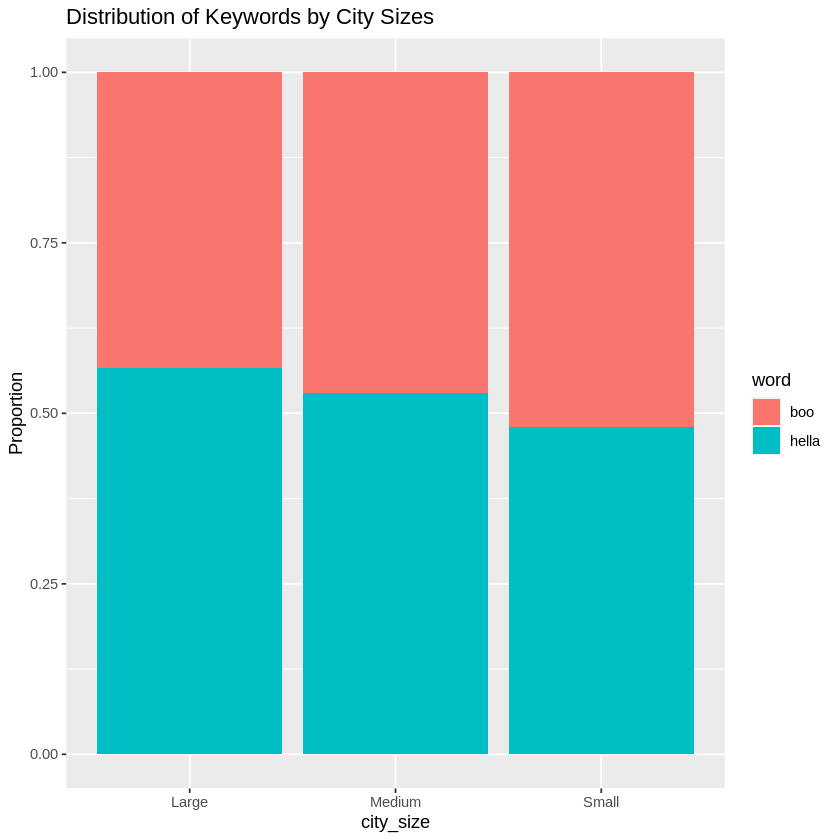

In [38]:
titles <- hiphop_df_clean %>%
  filter(word %in% c("boo", "hella")) %>%
  mutate(
    city_size = case_when(
      city > 200000 ~ "Large",
      city > 50000 ~ "Medium",
      TRUE ~ "Small"
    )
  )

ggplot(titles, aes(x = city_size, y = fam1, fill = word)) + geom_col(position = "fill") + ylab("Proportion") +
  ggtitle("Distribution of Keywords by City Sizes")

**Secret Subject**

An exciting twist to our exploration of the hiphop dataset: it turns out that none other than Justin Bieber himself participated incognito as one of the subjects! If you manage to identify him and send in your discovery, you'll be entered into a raffle for a once-in-a-lifetime opportunity to collaborate with the pop sensation on a hip-hop project.

First, let collect what information we know about Justin Beiber to help narrow down the participants. I know that Justin Bieber is a white male who was between the ages of 17 and 23 when this study was done. I also know that he is from Ontario which is a relatively small town (10,000-60,000 people).

Based on this information I think subject 17 is secretly Bieber. This is because this subject meets the hints provided for ethnicity, sex, age, city size. In addition to those hints, it makes sense that he would score highly on the beiber attribute because he knows his own songs.

# 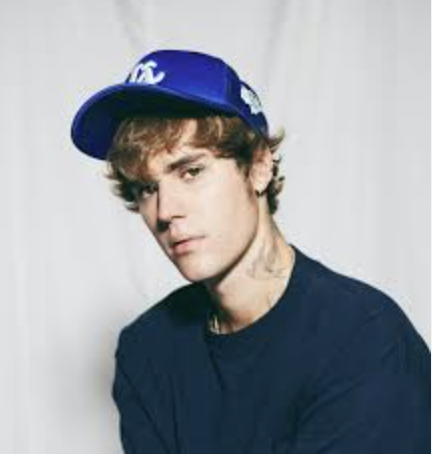

In [40]:
hiphop_df_clean %>%
  select(subj, ethnic_group, sex, age, city, bieber) %>%
  filter(ethnic_group == 1) %>%
  filter(sex == 'Male') %>%
  filter(age >= 17 & age <= 23) %>%
  filter(city >= 10000 & city <= 60000) %>%
  filter(bieber >= 5.0) %>%
  distinct(subj, .keep_all = TRUE)

subj,ethnic_group,sex,age,city,bieber
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
p17,1,Male,18,56377,5


Jimmy was so excited once I told him about his potential collaboration with Justin Bieber. He was wondering if I could use the dataset twith coming up with potential song titles for them.

I first created a new variable based on whether the subject was a Justin Bieber fan based on how many songs they knew of his. If they knew a lot (I categorized that as greater than or equal to 5) then they were considered a fan. Othwerise, they were not considered a fan.

Then I decided to see which genre Bieber fans knew the most artists from, on average. I compared this with those who were not Bieber fans and found the biggest difference in fans over nonfans to be the hiphop genre. I then decided to see which words Bieber fans were more familiar with compared to non fans (on average) and that is the list of words below.

In [41]:
hiphop_df_JB <- hiphop_df_clean %>%
  mutate(bieber_fan = case_when(bieber >= 5 ~ 1,
                           TRUE ~ 0))

In [42]:
hiphop_df_JB %>%
  select(bieber_fan, intl:unclassifiable) %>%
  pivot_longer(intl:unclassifiable,
               names_to = "genre",
               values_to = "num_artists") %>%
  group_by(bieber_fan, genre) %>%
   summarise(avg_num_artists = mean(num_artists)) %>%
  pivot_wider(names_from = bieber_fan,
              values_from = avg_num_artists)  %>%
    rename('non_bieber_fan' = '0', 'bieber_fan' = '1') %>%
    mutate(difference = bieber_fan - non_bieber_fan) %>%
    arrange(desc(difference)) %>%
    top_n(1)

`summarise()` has grouped output by 'bieber_fan'. You can override using the
`.groups` argument.
Selecting by difference


genre,non_bieber_fan,bieber_fan,difference
<chr>,<dbl>,<dbl>,<dbl>
hiphop,1.444444,3.133333,1.688889


In [43]:
hiphop_df_JB %>%
  select(word, bieber_fan, fam1) %>%
  group_by(word, bieber_fan) %>%
   summarise(avg_familarity = mean(fam1)) %>%
  pivot_wider(names_from = bieber_fan,
              values_from = avg_familarity)  %>%
    rename('non_bieber_fan' = '0', 'bieber_fan' = '1') %>%
    mutate(difference = bieber_fan - non_bieber_fan) %>%
    arrange(desc(difference))

`summarise()` has grouped output by 'word'. You can override using the
`.groups` argument.


word,non_bieber_fan,bieber_fan,difference
<chr>,<dbl>,<dbl>,<dbl>
finna,0.33333333,0.66666667,0.33333333
crump,0.41176471,0.73333333,0.32156863
what it do,0.49673203,0.80000000,0.30326797
What it is?,0.45098039,0.73333333,0.28235294
make it rain,0.52941176,0.80000000,0.27058824
guap,0.12418301,0.33333333,0.20915033
wile out,0.20915033,0.40000000,0.19084967
twurk,0.28104575,0.46666667,0.18562092
cuddie,0.10457516,0.26666667,0.16209150


**Song Titles**

I generated song titles using these keywords that Bieber fans are already familiar with:

*   Finna Make It Better
*   Crump Can Wait
*   What It Do In The City
*   What It Is? Nights
*   Just Make It Rain
*   We Need Guap
*   The New Wile Out
*   Its Only Twurk
*   Late Night Cuddie
*   Hollywood A-Town
*   Toe Up For A Dollar




# Conclusion

Our journey through the hiphop dataset has unveiled a plethora of insights into the intricate world of hip-hop. From deciphering the words that resonate with dedicated hip hop fans to exploring the interplay between music genres and demographic factors, our analysis has provided a rich tapestry of knowledge for aspiring artists and enthusiasts alike. Moreover, the discovery of Justin Bieber's participation added an exciting element of surprise and opportunity, offering one lucky individual the chance to collaborate with a global music icon and a unique experience in utlizing my creativity to create song titles.